# Fake News Detection Analysis

This notebook provides a comprehensive analysis of fake news detection using various machine learning models.

## Table of Contents
1. [Data Loading and Exploration](#data-loading)
2. [Data Preprocessing](#data-preprocessing)
3. [Model Training and Comparison](#model-training)
4. [Results Analysis](#results-analysis)
5. [Feature Analysis](#feature-analysis)
6. [Model Deployment](#model-deployment)


#### get_model.py

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np


# Check for optional dependencies (lazy loading)
def check_xgboost():
    try:
        import xgboost

        return True
    except ImportError:
        return False
    except Exception:
        # Handle XGBoost installation issues (like missing OpenMP)
        return False


def check_tensorflow():
    try:
        import tensorflow as tf

        # Test basic functionality
        tf.constant([1, 2, 3])
        return True
    except ImportError:
        return False
    except Exception as e:
        print(f"Warning: TensorFlow has issues: {str(e)}")
        return False


# Don't check at import time - check when needed
XGBOOST_AVAILABLE = None
TENSORFLOW_AVAILABLE = None

# TensorFlow imports will be done inside functions when needed


def get_model(
    model_type, num_classes=2, input_dim=None, max_features=None, max_length=None
):
    """
    Get different types of models for fake news detection

    Args:
        model_type (str): Type of model to create
        num_classes (int): Number of classes (default: 2 for binary classification)
        input_dim (int): Input dimension for neural networks
        max_features (int): Maximum number of features for embedding
        max_length (int): Maximum sequence length for neural networks

    Returns:
        model: The specified model
    """

    if model_type == "logistic":
        model = LogisticRegression(
            max_iter=1000, random_state=42, C=1.0, solver="liblinear"
        )

    elif model_type == "svm":
        model = SVC(kernel="linear", C=1.0, random_state=42, probability=True)

    elif model_type == "random_forest":
        model = RandomForestClassifier(
            n_estimators=100,
            random_state=42,
            max_depth=10,
            min_samples_split=5,
            min_samples_leaf=2,
        )

    elif model_type == "naive_bayes":
        model = MultinomialNB(alpha=1.0)

    elif model_type == "xgboost":
        if not check_xgboost():
            raise ImportError(
                "XGBoost is not available. Please install it with: pip install xgboost"
            )
        from xgboost import XGBClassifier

        model = XGBClassifier(
            n_estimators=100,
            random_state=42,
            max_depth=6,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
        )

    elif model_type == "lstm":
        if not check_tensorflow():
            raise ImportError(
                "TensorFlow is not available or has issues. Please install it with: pip install tensorflow"
            )
        if input_dim is None or max_features is None or max_length is None:
            raise ValueError(
                "For LSTM model, input_dim, max_features, and max_length must be provided"
            )

        try:
            import tensorflow as tf
            from tensorflow import keras

            model = keras.Sequential(
                [
                    keras.layers.Embedding(max_features, 128, input_length=max_length),
                    keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2),
                    keras.layers.Dense(32, activation="relu"),
                    keras.layers.Dropout(0.5),
                    keras.layers.Dense(num_classes, activation="softmax"),
                ]
            )

            model.compile(
                optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"],
            )
        except Exception as e:
            raise ImportError(
                f"Failed to create LSTM model due to TensorFlow issues: {str(e)}"
            )

    elif model_type == "bilstm":
        if not check_tensorflow():
            raise ImportError(
                "TensorFlow is not available. Please install it with: pip install tensorflow"
            )
        if input_dim is None or max_features is None or max_length is None:
            raise ValueError(
                "For BiLSTM model, input_dim, max_features, and max_length must be provided"
            )

        try:
            import tensorflow as tf
            from tensorflow import keras

            model = keras.Sequential(
                [
                    keras.layers.Embedding(max_features, 128, input_length=max_length),
                    keras.layers.Bidirectional(
                        keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2)
                    ),
                    keras.layers.Dense(32, activation="relu"),
                    keras.layers.Dropout(0.5),
                    keras.layers.Dense(num_classes, activation="softmax"),
                ]
            )

            model.compile(
                optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"],
            )
        except Exception as e:
            raise ImportError(
                f"Failed to create BiLSTM model due to TensorFlow issues: {str(e)}"
            )

    elif model_type == "cnn":
        if not check_tensorflow():
            raise ImportError(
                "TensorFlow is not available. Please install it with: pip install tensorflow"
            )
        if input_dim is None or max_features is None or max_length is None:
            raise ValueError(
                "For CNN model, input_dim, max_features, and max_length must be provided"
            )

        try:
            import tensorflow as tf
            from tensorflow import keras

            model = keras.Sequential(
                [
                    keras.layers.Embedding(max_features, 128, input_length=max_length),
                    keras.layers.Conv1D(128, 5, activation="relu"),
                    keras.layers.MaxPooling1D(5),
                    keras.layers.Conv1D(128, 5, activation="relu"),
                    keras.layers.MaxPooling1D(5),
                    keras.layers.Conv1D(128, 5, activation="relu"),
                    keras.layers.GlobalAveragePooling1D(),
                    keras.layers.Dense(128, activation="relu"),
                    keras.layers.Dropout(0.5),
                    keras.layers.Dense(num_classes, activation="softmax"),
                ]
            )

            model.compile(
                optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"],
            )
        except Exception as e:
            raise ImportError(
                f"Failed to create CNN model due to TensorFlow issues: {str(e)}"
            )

    elif model_type == "transformer":
        if not check_tensorflow():
            raise ImportError(
                "TensorFlow is not available. Please install it with: pip install tensorflow"
            )
        if input_dim is None or max_features is None or max_length is None:
            raise ValueError(
                "For Transformer model, input_dim, max_features, and max_length must be provided"
            )

        try:
            import tensorflow as tf
            from tensorflow import keras

            # Input layer
            inputs = keras.layers.Input(shape=(max_length,))

            # Embedding layer
            embedding = keras.layers.Embedding(max_features, 128)(inputs)

            # Multi-head attention
            attention = keras.layers.MultiHeadAttention(num_heads=8, key_dim=128)(
                embedding, embedding
            )
            attention = keras.layers.LayerNormalization()(attention)

            # Add & Norm
            attention = keras.layers.Add()([embedding, attention])
            attention = keras.layers.LayerNormalization()(attention)

            # Global average pooling
            pooled = keras.layers.GlobalAveragePooling1D()(attention)

            # Dense layers
            dense = keras.layers.Dense(128, activation="relu")(pooled)
            dense = keras.layers.Dropout(0.5)(dense)
            dense = keras.layers.Dense(64, activation="relu")(dense)
            dense = keras.layers.Dropout(0.3)(dense)
            outputs = keras.layers.Dense(num_classes, activation="softmax")(dense)

            model = keras.Model(inputs, outputs)
            model.compile(
                optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"],
            )
        except Exception as e:
            raise ImportError(
                f"Failed to create Transformer model due to TensorFlow issues: {str(e)}"
            )

    else:
        raise ValueError(f"Unknown model type: {model_type}")

    return model


def get_model_info(model_type):
    """
    Get information about different model types

    Args:
        model_type (str): Type of model

    Returns:
        dict: Model information
    """
    model_info = {
        "logistic": {
            "name": "Logistic Regression",
            "type": "Traditional ML",
            "description": "Linear classifier using logistic function",
            "pros": ["Fast", "Interpretable", "Good baseline"],
            "cons": ["Linear decision boundary", "May underfit complex patterns"],
        },
        "svm": {
            "name": "Support Vector Machine",
            "type": "Traditional ML",
            "description": "Finds optimal hyperplane for classification",
            "pros": ["Effective in high dimensions", "Memory efficient"],
            "cons": ["Slow on large datasets", "Sensitive to feature scaling"],
        },
        "random_forest": {
            "name": "Random Forest",
            "type": "Ensemble ML",
            "description": "Ensemble of decision trees",
            "pros": [
                "Handles non-linear patterns",
                "Feature importance",
                "Robust to overfitting",
            ],
            "cons": ["Can be slow", "Less interpretable than single tree"],
        },
        "naive_bayes": {
            "name": "Naive Bayes",
            "type": "Traditional ML",
            "description": "Probabilistic classifier based on Bayes theorem",
            "pros": [
                "Fast",
                "Good for text classification",
                "Works well with small datasets",
            ],
            "cons": [
                "Assumes feature independence",
                "Can be outperformed by other methods",
            ],
        },
        "xgboost": {
            "name": "XGBoost",
            "type": "Gradient Boosting",
            "description": "Gradient boosting framework",
            "pros": [
                "High performance",
                "Handles missing values",
                "Feature importance",
            ],
            "cons": ["Can overfit", "Requires parameter tuning", "Less interpretable"],
        },
        "lstm": {
            "name": "LSTM",
            "type": "Deep Learning",
            "description": "Long Short-Term Memory neural network",
            "pros": [
                "Captures sequential patterns",
                "Good for text",
                "Handles long sequences",
            ],
            "cons": ["Slow training", "Requires more data", "Black box"],
        },
        "bilstm": {
            "name": "Bidirectional LSTM",
            "type": "Deep Learning",
            "description": "LSTM that processes sequences in both directions",
            "pros": ["Better context understanding", "Improved performance"],
            "cons": ["Slower than unidirectional", "More parameters"],
        },
        "cnn": {
            "name": "Convolutional Neural Network",
            "type": "Deep Learning",
            "description": "CNN for text classification using 1D convolutions",
            "pros": ["Fast training", "Good for local patterns", "Parallelizable"],
            "cons": ["Limited context window", "May miss long-range dependencies"],
        },
        "transformer": {
            "name": "Transformer",
            "type": "Deep Learning",
            "description": "Attention-based neural network",
            "pros": [
                "Captures long-range dependencies",
                "State-of-the-art performance",
            ],
            "cons": ["Complex", "Requires large datasets", "Computationally expensive"],
        },
    }

    return model_info.get(
        model_type,
        {"name": "Unknown", "type": "Unknown", "description": "Unknown model type"},
    )


def compare_models():
    """
    Print comparison of all available models
    ry"""
    print("Available Models for Fake News Detection:")
    print("=" * 50)

    model_types = [
        "logistic",
        "svm",
        "random_forest",
        "naive_bayes",
        "xgboost",
        "lstm",
        "bilstm",
        "cnn",
        "transformer",
    ]

    for model_type in model_types:
        info = get_model_info(model_type)
        print(f"\n{info['name']} ({model_type})")
        print(f"Type: {info['type']}")
        print(f"Description: {info['description']}")
        print(f"Pros: {', '.join(info['pros'])}")
        print(f"Cons: {', '.join(info['cons'])}")
        print("-" * 30)

### processing_data.py

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import warnings

warnings.filterwarnings("ignore")

# Download required NLTK data
try:
    nltk.data.find("tokenizers/punkt")
except LookupError:
    nltk.download("punkt")

try:
    nltk.data.find("corpora/stopwords")
except LookupError:
    nltk.download("stopwords")

try:
    nltk.data.find("corpora/wordnet")
except LookupError:
    nltk.download("wordnet")


class FakeNewsPreprocessor:
    def __init__(self):
        self.stop_words = set(stopwords.words("english"))
        self.lemmatizer = WordNetLemmatizer()
        self.tfidf_vectorizer = TfidfVectorizer(
            max_features=5000,
            stop_words="english",
            ngram_range=(1, 2),
            min_df=2,
            max_df=0.95,
        )

    def load_data(self, fake_path, true_path):
        """Load fake and true news datasets"""
        print("Loading datasets...")

        # Load fake news data
        fake_df = pd.read_csv(fake_path)
        fake_df["label"] = 0  # 0 for fake news

        # Load true news data
        true_df = pd.read_csv(true_path)
        true_df["label"] = 1  # 1 for true news

        # Combine datasets
        combined_df = pd.concat([fake_df, true_df], ignore_index=True)

        print(f"Fake news samples: {len(fake_df)}")
        print(f"True news samples: {len(true_df)}")
        print(f"Total samples: {len(combined_df)}")

        return combined_df

    def clean_text(self, text):
        """Clean and preprocess text data"""
        if pd.isna(text):
            return ""

        # Convert to lowercase
        text = str(text).lower()

        # Remove URLs
        text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)

        # Remove email addresses
        text = re.sub(r"\S+@\S+", "", text)

        # Remove special characters and digits
        text = re.sub(r"[^a-zA-Z\s]", "", text)

        # Remove extra whitespace
        text = re.sub(r"\s+", " ", text).strip()

        return text

    def preprocess_data(self, df):
        """Main preprocessing function"""
        print("Starting data preprocessing...")

        # Create a copy to avoid modifying original
        df_processed = df.copy()

        # Handle missing values
        print("Handling missing values...")
        df_processed = df_processed.dropna(subset=["title", "text"])

        # Remove duplicates
        print("Removing duplicates...")
        df_processed = df_processed.drop_duplicates()

        # Clean text columns
        print("Cleaning text data...")
        df_processed["title_clean"] = df_processed["title"].apply(self.clean_text)
        df_processed["text_clean"] = df_processed["text"].apply(self.clean_text)

        # Combine title and text for better feature representation
        df_processed["combined_text"] = (
            df_processed["title_clean"] + " " + df_processed["text_clean"]
        )

        # Remove rows with empty combined text
        df_processed = df_processed[df_processed["combined_text"].str.len() > 10]

        print(f"Final dataset shape: {df_processed.shape}")
        print(f"Label distribution:\n{df_processed['label'].value_counts()}")

        return df_processed

    def vectorize_text(self, X_train, X_test):
        """Convert text to TF-IDF vectors"""
        print("Vectorizing text data...")

        # Fit TF-IDF on training data
        X_train_tfidf = self.tfidf_vectorizer.fit_transform(X_train)
        X_test_tfidf = self.tfidf_vectorizer.transform(X_test)

        print(
            f"TF-IDF matrix shape - Train: {X_train_tfidf.shape}, Test: {X_test_tfidf.shape}"
        )

        return X_train_tfidf, X_test_tfidf

    def split_data(self, df, test_size=0.2, random_state=42):
        """Split data into train and test sets"""
        print("Splitting data into train/test sets...")

        X = df["combined_text"]
        y = df["label"]

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state, stratify=y
        )

        print(f"Train set: {len(X_train)} samples")
        print(f"Test set: {len(X_test)} samples")

        return X_train, X_test, y_train, y_test

    def train_logistic_regression(self, X_train_tfidf, y_train):
        """Train logistic regression model"""
        print("Training Logistic Regression model...")

        model = LogisticRegression(
            random_state=42, max_iter=1000, C=1.0, solver="liblinear"
        )

        model.fit(X_train_tfidf, y_train)

        print("Model training completed!")
        return model

    def evaluate_model(self, model, X_test_tfidf, y_test):
        """Evaluate model performance"""
        print("Evaluating model...")

        # Make predictions
        y_pred = model.predict(X_test_tfidf)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")

        # Classification report
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=["Fake", "True"]))

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        print("\nConfusion Matrix:")
        print(cm)

        return y_pred, accuracy

    def plot_results(self, y_test, y_pred):
        """Plot evaluation results"""
        # Confusion Matrix Heatmap
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(
            cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=["Fake", "True"],
            yticklabels=["Fake", "True"],
        )
        plt.title("Confusion Matrix")
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")

        # Feature importance (top 20)
        plt.subplot(1, 2, 2)
        feature_names = self.tfidf_vectorizer.get_feature_names_out()
        feature_importance = np.abs(self.model.coef_[0])
        top_indices = np.argsort(feature_importance)[-20:]

        plt.barh(range(20), feature_importance[top_indices])
        plt.yticks(range(20), [feature_names[i] for i in top_indices])
        plt.title("Top 20 Most Important Features")
        plt.xlabel("Feature Importance")

        plt.tight_layout()
        plt.show()

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 1. Data Loading and Exploration {#data-loading}


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Import our custom modules
# import sys
# import os
# sys.path.append('../src')
# sys.path.append('../model')

# from preprocess_data import FakeNewsPreprocessor
# from get_model import get_model, get_model_info, compare_models

print("Libraries imported successfully!")


Libraries imported successfully!


In [4]:
# Load the data
fake_path = "/kaggle/input/task-data/fake.csv"
true_path = "/kaggle/input/task-data/true.csv"

preprocessor = FakeNewsPreprocessor()
df = preprocessor.load_data(fake_path, true_path)

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")


Loading datasets...
Fake news samples: 23481
True news samples: 21417
Total samples: 44898
Dataset shape: (44898, 5)
Columns: ['title', 'text', 'subject', 'date', 'label']


In [5]:
# Display basic information about the dataset
print("Dataset Info:")
print("=" * 50)
print(df.info())

print("\nFirst few rows:")
print("=" * 50)
df.head()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None

First few rows:


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [6]:
# Check for missing values
print("Missing values:")
print("=" * 30)
print(df.isnull().sum())

# Check label distribution
print("\nLabel distribution:")
print("=" * 30)
print(df['label'].value_counts())
print(f"\nFake news: {df['label'].value_counts()[0]} ({df['label'].value_counts()[0]/len(df)*100:.1f}%)")
print(f"True news: {df['label'].value_counts()[1]} ({df['label'].value_counts()[1]/len(df)*100:.1f}%)")


Missing values:
title      0
text       0
subject    0
date       0
label      0
dtype: int64

Label distribution:
label
0    23481
1    21417
Name: count, dtype: int64

Fake news: 23481 (52.3%)
True news: 21417 (47.7%)


## 2. Data Preprocessing and Model Training


In [7]:
# Preprocess the data and train models
print("Starting data preprocessing...")
df_processed = preprocessor.preprocess_data(df)

# Split the data
X_train, X_test, y_train, y_test = preprocessor.split_data(df_processed)

# Vectorize text for traditional ML models
X_train_tfidf, X_test_tfidf = preprocessor.vectorize_text(X_train, X_test)

print(f"Training set: {X_train_tfidf.shape}")
print(f"Test set: {X_test_tfidf.shape}")


Starting data preprocessing...
Starting data preprocessing...
Handling missing values...
Removing duplicates...
Cleaning text data...
Final dataset shape: (44680, 8)
Label distribution:
label
0    23469
1    21211
Name: count, dtype: int64
Splitting data into train/test sets...
Train set: 35744 samples
Test set: 8936 samples
Vectorizing text data...
TF-IDF matrix shape - Train: (35744, 5000), Test: (8936, 5000)
Training set: (35744, 5000)
Test set: (8936, 5000)


In [8]:
# Train and compare multiple models
models_to_test = ['logistic', 'svm', 'random_forest', 'naive_bayes']
results = {}

for model_type in models_to_test:
    print(f"\nTraining {model_type} model...")
    print("-" * 40)
    
    # Create and train model
    model = get_model(model_type)
    model.fit(X_train_tfidf, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_tfidf)
    
    # Calculate accuracy
    from sklearn.metrics import accuracy_score, classification_report
    accuracy = accuracy_score(y_test, y_pred)
    
    results[model_type] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Fake', 'True']))



Training logistic model...
----------------------------------------
Accuracy: 0.9917
Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4694
        True       0.99      0.99      0.99      4242

    accuracy                           0.99      8936
   macro avg       0.99      0.99      0.99      8936
weighted avg       0.99      0.99      0.99      8936


Training svm model...
----------------------------------------
Accuracy: 0.9955
Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4694
        True       1.00      1.00      1.00      4242

    accuracy                           1.00      8936
   macro avg       1.00      1.00      1.00      8936
weighted avg       1.00      1.00      1.00      8936


Training random_forest model...
----------------------------------------
Accuracy: 0.9925
Classification Report:
              preci

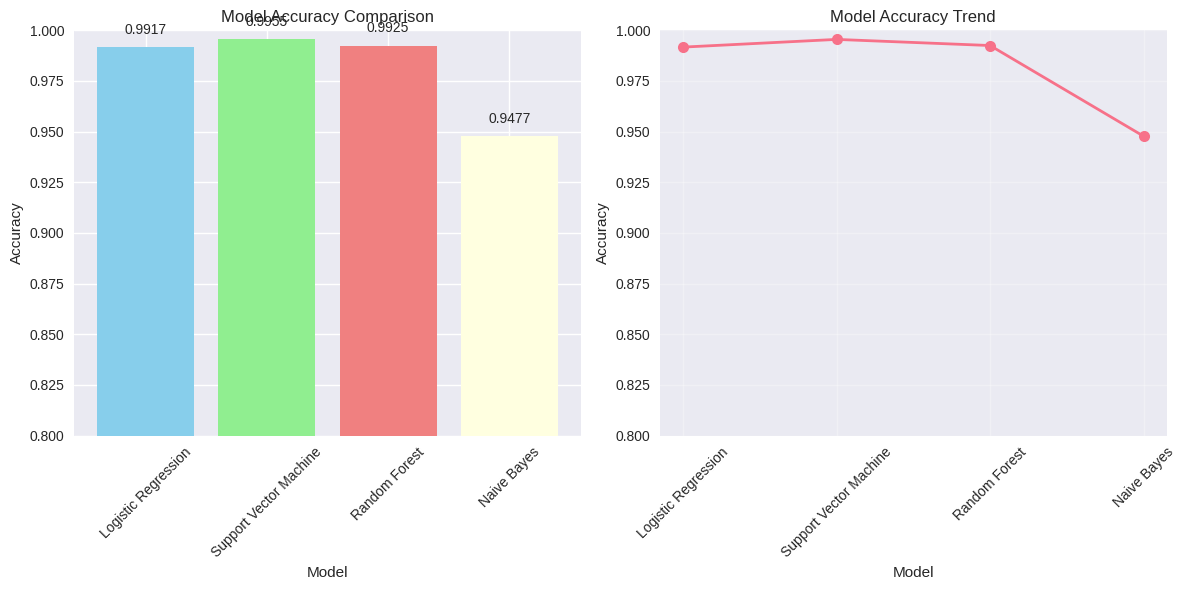


Best Model: Support Vector Machine with accuracy: 0.9955


In [9]:
# Compare model accuracies
accuracies = [results[model]['accuracy'] for model in models_to_test]
model_names = [get_model_info(model)['name'] for model in models_to_test]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{acc:.4f}', ha='center', va='bottom')

plt.subplot(1, 2, 2)
plt.plot(model_names, accuracies, marker='o', linewidth=2, markersize=8)
plt.title('Model Accuracy Trend')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find best model
best_model_type = models_to_test[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"\nBest Model: {get_model_info(best_model_type)['name']} with accuracy: {best_accuracy:.4f}")


In [10]:
# Create a prediction function
def predict_news(text, model, preprocessor):
    """
    Predict if a news article is fake or true
    
    Args:
        text (str): News article text
        model: Trained model
        preprocessor: Trained preprocessor
    
    Returns:
        dict: Prediction results
    """
    # Clean the text
    cleaned_text = preprocessor.clean_text(text)
    
    # Vectorize
    text_vectorized = preprocessor.tfidf_vectorizer.transform([cleaned_text])
    
    # Predict
    prediction = model.predict(text_vectorized)[0]
    
    # Get probability if available
    if hasattr(model, 'predict_proba'):
        probability = model.predict_proba(text_vectorized)[0]
        confidence = max(probability)
    else:
        confidence = None
    
    return {
        'prediction': 'Fake' if prediction == 0 else 'True',
        'confidence': confidence,
        'fake_probability': probability[0] if confidence else None,
        'true_probability': probability[1] if confidence else None
    }

# Test the prediction function
sample_text = "This is a test news article to see how our model performs."
best_model = results[best_model_type]['model']
result = predict_news(sample_text, best_model, preprocessor)

print("Sample Prediction:")
print("=" * 30)
print(f"Text: {sample_text}")
print(f"Prediction: {result['prediction']}")
if result['confidence']:
    print(f"Confidence: {result['confidence']:.4f}")
    print(f"Fake Probability: {result['fake_probability']:.4f}")
    print(f"True Probability: {result['true_probability']:.4f}")

Sample Prediction:
Text: This is a test news article to see how our model performs.
Prediction: Fake
Confidence: 0.9989
Fake Probability: 0.9989
True Probability: 0.0011
